In [135]:
import os
import pandas as pd

In [141]:
# 获取当前目录下所有的.txt文件
txt_files = [f for f in os.listdir('.') if f.endswith('.txt')]

# 使用字典来存储每个文件的数列
data_dict = {}

# 遍历每个.txt文件
for file_name in txt_files:
    # 去掉文件扩展名，用于命名
    list_name = file_name.replace('.txt', '')
    
    # 读取文件内容，假设以逗号分隔
    try:
        # 读取txt文件，指定分隔符为逗号
        data = pd.read_csv(file_name, header=None, delimiter=',')
        
        # 如果文件内容是单行或单列，转为Series；如果是多行，转为DataFrame
        if data.shape[0] == 1:
            data_dict[list_name] = data.iloc[0].tolist()  # 转为列表
        else:
            data_dict[list_name] = data  # 保持为DataFrame
    except Exception as e:
        print(f"读取文件 {file_name} 时出错: {e}")

# 打印结果
for name, data in data_dict.items():
    print(f"列表 {name}: {data}")

列表 26pwoff_1: [2946, 3056, 3074, 4423, 550, 1647, 544, 565, 545, 1649, 544, 561, 573, 539, 470, 1719, 546, 1648, 570, 526, 474, 1732, 569, 543, 476, 1714, 542, 570, 471, 597, 545, 564, 539, 547, 568, 537, 542, 553, 529, 573, 576, 531, 536, 558, 497, 1621, 117, 66, 497, 509, 539, 569, 567, 527, 476, 624, 578, 530, 563, 531, 475, 626, 568, 540, 534, 551, 535, 573, 509, 602, 482, 602, 538, 571, 507, 602, 460, 624, 536, 573, 516, 569, 536, 572, 531, 578, 483, 1710, 532, 1662, 537, 573, 505, 603, 511, 573, 535, 573, 507, 601, 512, 597, 483, 603, 506, 601, 512, 598, 482, 603, 508, 600, 510, 575, 507, 601, 509, 601, 481, 605, 505, 1712, 479, 607, 504, 604, 504, 606, 477, 606, 503, 608, 477, 630, 475, 635, 474, 636, 473, 611, 472, 636, 474, 636, 472, 611, 474, 636, 472, 612, 473, 636, 473, 637, 471, 613, 472, 637, 472, 637, 472, 612, 473, 637, 470, 613, 472, 637, 473, 637, 470, 614, 471, 638, 472, 637, 471, 613, 472, 637, 470, 614, 472, 637, 472, 638, 470, 614, 471, 638, 472, 638, 446, 637, 47

In [137]:
import matplotlib.pyplot as plt
import numpy as np

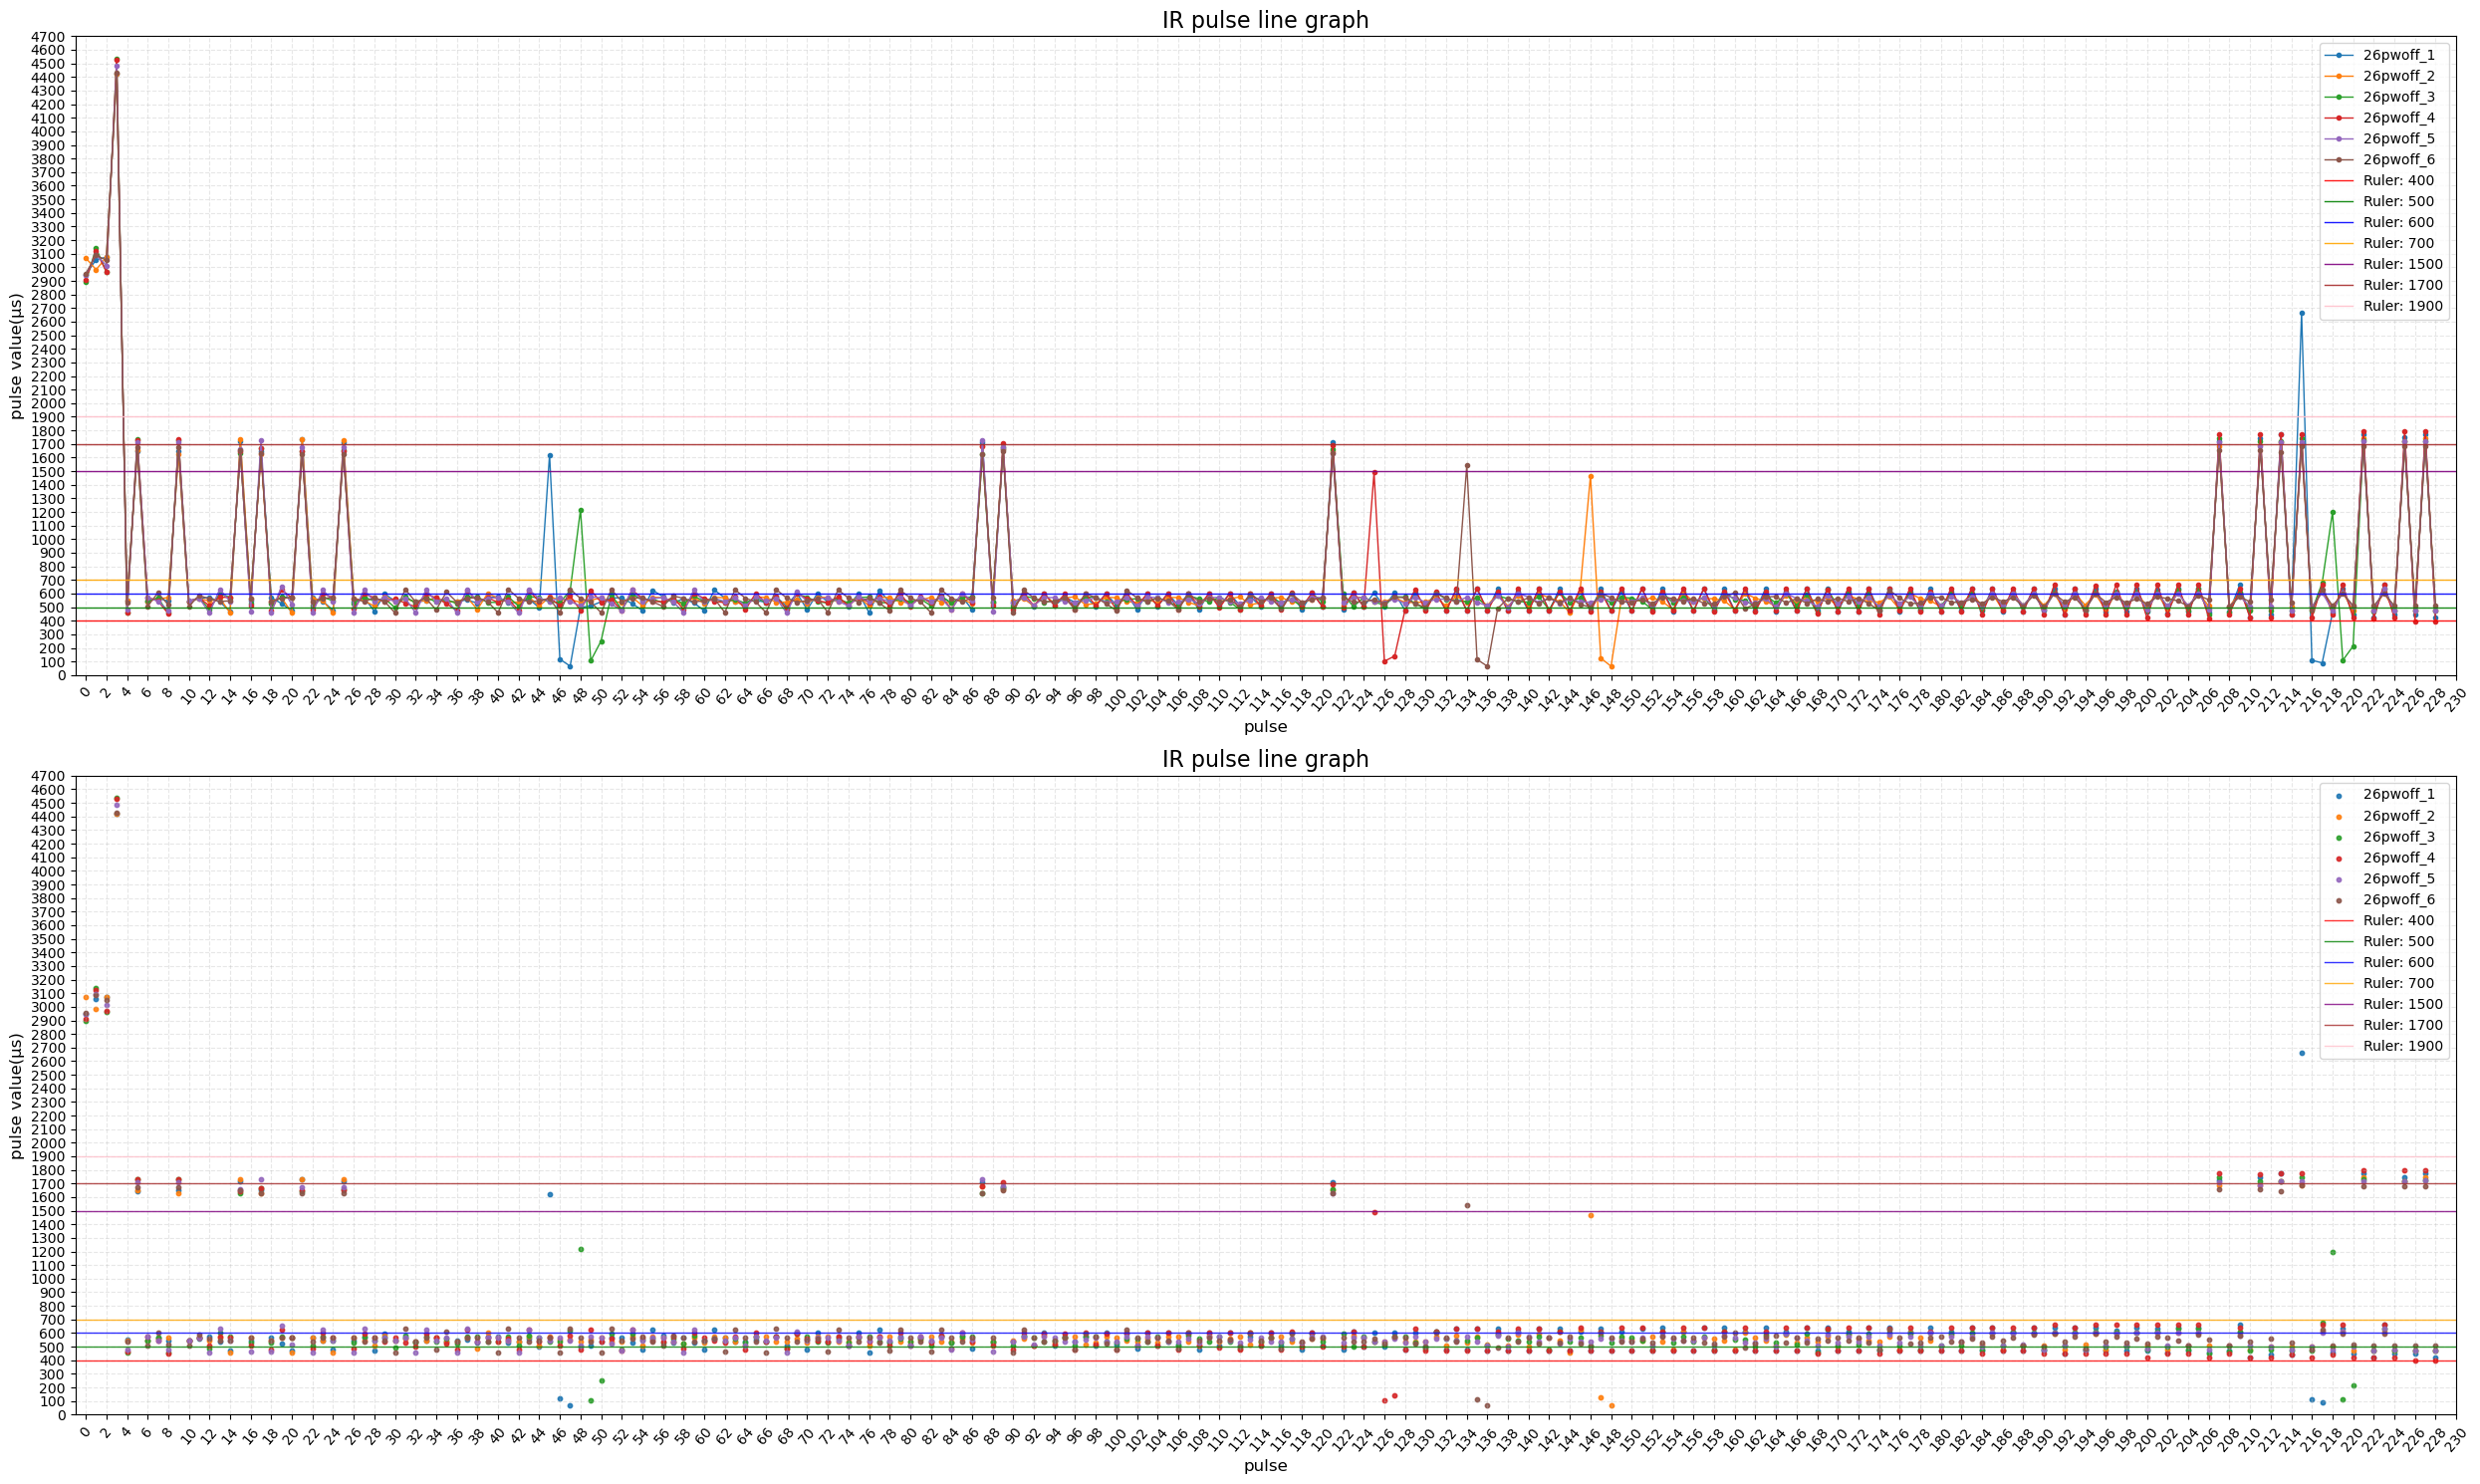

In [142]:
def plot_data_lists(data_dict, x_label="X轴", y_label="Y轴", title="数据折线图", horizontal_lines=None):
    # 预定义颜色列表用于水平线
    line_colors = ['red', 'green', 'blue', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan', 'magenta', 'yellow']
    
    # 创建两行子图
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(25, 15))     # 创建一个图窗(figure)和两个子图(axes)，按2行1列排列，fig 是整个图窗对象，ax1 和 ax2 分别是上下两个子图的对象，figsize=(25, 16) 设置图窗的大小为宽25英寸，高16英寸
    
    # 绘制折线图
    for name, data in data_dict.items():
        if hasattr(data, 'values'):
            data = data.values.flatten()
        
        x = np.arange(len(data))
        ax1.plot(x, data, label=name, linewidth=1, marker='o', markersize=3)
    
    # 添加水平标尺线到折线图
    if horizontal_lines:
        for i, line_value in enumerate(horizontal_lines):
            color = line_colors[i % len(line_colors)]
            ax1.axhline(y=line_value, color=color, linestyle='-', linewidth=1, alpha=0.9, label=f'Ruler: {line_value}') # y是线的Y轴位置，color是颜色，linestyle是线型，linewidth是线宽，alpha是透明度
    
    # 设置折线图属性
    ax1.set_title(f"{title}", fontsize=16) # 设置子图标题和字体大小
    ax1.set_xlabel(x_label, fontsize=12) # 设置X轴标签和字体大小
    ax1.set_ylabel(y_label, fontsize=12)
    ax1.grid(True, linestyle='--', alpha=0.3) # 显示网格线，并设置样式
    ax1.legend(fontsize=10) # 显示图例，并设置字体大小
    ax1.xaxis.set_major_locator(plt.MultipleLocator(2)) # 设置X轴主刻度的间隔为2
    ax1.tick_params(axis='x', rotation=50) # X轴刻度标签旋转50度
    ax1.yaxis.set_major_locator(plt.MultipleLocator(100))
    ax1.set_xlim([-1, 230])  # 设置定义域
    ax1.set_ylim([0, 4700])
    
    # 绘制散点图
    for name, data in data_dict.items():
        if hasattr(data, 'values'):
            data = data.values.flatten()
        
        x = np.arange(len(data))
        ax2.scatter(x, data, label=name, s=10, alpha=0.9) # s参数设置点的大小，alpha设置点的透明度
    
    # 添加水平标尺线到散点图
    if horizontal_lines:
        for i, line_value in enumerate(horizontal_lines):
            color = line_colors[i % len(line_colors)]
            ax2.axhline(y=line_value, color=color, linestyle='-', 
                       linewidth=1, alpha=0.8, 
                       label=f'Ruler: {line_value}')
    
    # 设置散点图属性
    ax2.set_title(f"{title}", fontsize=16)
    ax2.set_xlabel(x_label, fontsize=12)
    ax2.set_ylabel(y_label, fontsize=12)
    ax2.grid(True, linestyle='--', alpha=0.3)
    ax2.legend(fontsize=10)
    ax2.xaxis.set_major_locator(plt.MultipleLocator(2))
    ax2.tick_params(axis='x', rotation=50)
    ax2.yaxis.set_major_locator(plt.MultipleLocator(100))
    ax2.set_xlim([-1, 230])
    ax2.set_ylim([0, 4700])
    
    plt.tight_layout()
    plt.show()

# 设定标尺
reference_lines = [400, 500, 600, 700,1500, 1700, 1900]

plot_data_lists(data_dict, 
                x_label="pulse", 
                y_label="pulse value(μs)", 
                title="IR pulse line graph",
                horizontal_lines=reference_lines)